# final project - KICKSTARTER

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

## import libraries

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from datetime import date


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats.mstats import winsorize

import math
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

# language libraries
from textblob import TextBlob
import langid
import yake

## import data

In [264]:
files = os.listdir('Data')
files

['dataset_my-task-1_2021-10-31_18-52-00-573.xlsx',
 'dataset_my-task-2_2021-10-31_18-52-00-523.xlsx',
 'dataset_my-task-3_2021-10-31_18-52-00-929.xlsx',
 'dataset_my-task-4_2021-10-31_18-51-58-474.xlsx',
 'dataset_my-task_2021-10-31_18-51-58-693.xlsx',
 'kickstarter_all_enddate_30102021.xlsx',
 'kickstarter_all_mostbacked.xlsx',
 'kickstarter_all_newest_30102021.xlsx',
 'kickstarter_all_popularity_30102021.xlsx',
 'kickstarter_art_enddate.xlsx',
 'kickstarter_art_newest.xlsx',
 'kickstarter_comics_enddate.xlsx',
 'kickstarter_comics_newest.xlsx',
 'kickstarter_crafts_enddate.xlsx',
 'kickstarter_crafts_newest.xlsx',
 'kickstarter_dance_enddate.xlsx',
 'kickstarter_dance_enddate2.xlsx',
 'kickstarter_dance_newest.xlsx',
 'kickstarter_design_enddate.xlsx',
 'kickstarter_design_newest.xlsx',
 'kickstarter_fashion_enddate.xlsx',
 'kickstarter_fashion_newest.xlsx',
 'kickstarter_film_enddate.xlsx',
 'kickstarter_food_enddate.xlsx',
 '~$kickstarter_all_enddate_30102021.xlsx']

In [266]:
files = os.listdir('Data')

df = pd.DataFrame()

path = os.getcwd() + "\\Data" + "\\"

for i in files:
    data = pd.read_excel(path + i)
    df = df.append(data)

## first review and clean data

### review

In [267]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 18576 rows and 47 columns


In [268]:
df.sample(5)

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
531,130,A limited edition hardcover book of art by the...,22,Illustration,art/illustration,11275,US,the United States,1630091356,"Fri, 27 Aug 2021 19:09:16 +0000",...,successful,1633030440,1.000000,Paintings and Drawings by Rowena,https://www.kickstarter.com/projects/686482908...,1.000000,11275.000000,domestic,NaN,NaN
2389,45,"You’re an original—and your pants should be, t...",262,Accessories,fashion/accessories,5737,US,the United States,1563288068,"Tue, 16 Jul 2019 14:41:08 +0000",...,successful,1574528020,1.000000,Cuffs by Rhubarb Envy™ (Patent Pending),https://www.kickstarter.com/projects/rhubarben...,1.000000,5737.000000,domestic,NaN,NaN
1740,339,A 300 page manga sized book-Shonen Jump for we...,3,Comics,comics,9614,US,the United States,1602037107,"Wed, 07 Oct 2020 02:18:27 +0000",...,successful,1616158809,1.000000,PROJECT: Big Hype,https://www.kickstarter.com/projects/bighypeco...,1.000000,9614.000000,domestic,NaN,NaN
269,24,soft enamel camera or tattoo gun pin in the st...,1,Art,art,583,US,the United States,1633462685,"Tue, 05 Oct 2021 19:38:05 +0000",...,live,1634616124,1.000000,ENAMEL PIN PLAYING CARD,https://www.kickstarter.com/projects/offbasepi...,1.000000,583.000000,domestic,NaN,NaN
582,88,A collection of cute Ghibli inspired anime ena...,262,Accessories,fashion/accessories,2750,GB,the United Kingdom,1620388920,"Fri, 07 May 2021 12:02:00 +0000",...,successful,1622574000,1.412044,Super cute anime enamel pins!,https://www.kickstarter.com/projects/charlotte...,1.423715,2728.069897,domestic,NaN,NaN


### review column names

In [269]:
df.columns

Index(['backers_count', 'blurb', 'categoryId', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'created_at_formatted', 'creatorAvatar', 'creatorId',
       'creatorName', 'creatorUrl', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline', 'description',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'launched_at_formatted', 'link', 'locationId',
       'locationName', 'name', 'photo', 'pledged', 'pubDate', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'title', 'url', 'usd_exchange_rate', 'usd_pledged',
       'usd_type', 'is_backing', 'is_starred'],
      dtype='object')

no cleaning of column names required

### Drop Duplicates

In [270]:
df.shape

(18576, 47)

In [271]:
df = df.drop_duplicates()

In [272]:
df.shape

(18462, 47)

xxx duplicates have been dropped

### drop duplicate projects with different values

#### check for duplicate projects

In [273]:
df.duplicated(subset='id', keep='first').sum()

2825

There are 2.825 duplicated projects present.

#### review duplicates

In [274]:
df[df.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
213,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.379470,8038.070698,domestic,NaN,NaN
208,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.379470,8038.070698,domestic,NaN,NaN
28,46,Nomadnoos' second book for responsible knitters!,348,Knitting,crafts/knitting,5626,CH,Switzerland,1634032022,"Tue, 12 Oct 2021 09:47:02 +0000",...,live,1634800571,1.082175,"Wabi-Sabi, The Beauty of Artisanally Made Yarns",https://www.kickstarter.com/projects/nomadnoos...,1.096879,5551.557545,domestic,NaN,NaN
15,46,Nomadnoos' second book for responsible knitters!,348,Knitting,crafts/knitting,5626,CH,Switzerland,1634032022,"Tue, 12 Oct 2021 09:47:02 +0000",...,live,1634800571,1.082175,"Wabi-Sabi, The Beauty of Artisanally Made Yarns",https://www.kickstarter.com/projects/nomadnoos...,1.096879,5551.557545,international,NaN,NaN
111,22,A collection of hard enamel pins featuring cha...,26,Crafts,crafts,887,US,the United States,1625548016,"Tue, 06 Jul 2021 05:06:56 +0000",...,successful,1628517977,1.000000,BNHA Chibi Enamel Pins,https://www.kickstarter.com/projects/midnightp...,1.000000,887.000000,domestic,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,13,An Ecclectic collection of comics about Grumpy...,3,Comics,comics,351,US,the United States,1628912973,"Sat, 14 Aug 2021 03:49:33 +0000",...,live,1630518944,1.000000,Grumpy Molly Soup and Other Peculiar Tales!,https://www.kickstarter.com/projects/dixon373/...,1.000000,351.000000,domestic,NaN,NaN
319,13,An Ecclectic collection of comics about Grumpy...,3,Comics,comics,351,US,the United States,1628912973,"Sat, 14 Aug 2021 03:49:33 +0000",...,live,1630518944,1.000000,Grumpy Molly Soup and Other Peculiar Tales!,https://www.kickstarter.com/projects/dixon373/...,1.000000,351.000000,domestic,NaN,NaN
50,98,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2027,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.379470,2019.497084,international,NaN,NaN
325,98,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2027,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.379470,2019.497084,domestic,NaN,NaN


#### drop double listing of projects

In [275]:
df = (df.sort_values(by=['id', 'pubDate'], ascending=False).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

#### set id as index and review shape after drop

In [276]:
df = df.set_index('id')

In [277]:
df.shape

(15637, 46)

### review dtypes

In [278]:
df.dtypes

backers_count                 int64
blurb                        object
categoryId                    int64
categoryName                 object
categorySlug                 object
converted_pledged_amount      int64
country                      object
country_displayable_name     object
created_at                    int64
created_at_formatted         object
creatorAvatar                object
creatorId                     int64
creatorName                  object
creatorUrl                   object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
description                  object
disable_communication          bool
fx_rate                     float64
goal                        float64
is_starrable                   bool
launched_at                   int64
launched_at_formatted        object
link                         object
locationId                  

to review

In [279]:
to_drop = ['creatorAvatar', 'creatorId', 'creatorName', 'creatorUrl', 'id', 'link', 'photo']

In [280]:
### Review DTypes

df.dtypes

# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia

#data = data.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})

df.dtypes

backers_count                 int64
blurb                        object
categoryId                    int64
categoryName                 object
categorySlug                 object
converted_pledged_amount      int64
country                      object
country_displayable_name     object
created_at                    int64
created_at_formatted         object
creatorAvatar                object
creatorId                     int64
creatorName                  object
creatorUrl                   object
currency                     object
currency_symbol              object
currency_trailing_code         bool
current_currency             object
deadline                      int64
description                  object
disable_communication          bool
fx_rate                     float64
goal                        float64
is_starrable                   bool
launched_at                   int64
launched_at_formatted        object
link                         object
locationId                  

### Null Values

In [281]:
df.isna().any()

backers_count               False
blurb                       False
categoryId                  False
categoryName                False
categorySlug                False
converted_pledged_amount    False
country                     False
country_displayable_name    False
created_at                  False
created_at_formatted        False
creatorAvatar               False
creatorId                   False
creatorName                 False
creatorUrl                  False
currency                    False
currency_symbol             False
currency_trailing_code      False
current_currency            False
deadline                    False
description                 False
disable_communication       False
fx_rate                     False
goal                        False
is_starrable                False
launched_at                 False
launched_at_formatted       False
link                        False
locationId                  False
locationName                False
name          

No null values present in this dataset

### Data Values

In [282]:
for col in data:
    print(data[col].value_counts(), '\n')

3      3
77     1
61     1
1      1
24     1
151    1
5      1
39     1
145    1
305    1
Name: backers_count, dtype: int64 

Fruit-First Hydrating Freezies                                                                                                          1
Free Food Pantry, "Pay What You Can" Thrift Store and Community Hub for Arts, Education, and Empowerment                                1
Our Kickstarter will help secure a lease on a commercial kitchen and launch our full scale catering & events company in Brooklyn NY.    1
Gourmet coffee, donuts and bagels shop growing to service more of Colchester Country!                                                   1
2 Italian butchers and farmers transplanted in Vermont bring you cured meats coming from animals raised using sustainable practices     1
We want to bring quick, quality and convenient, drive thru coffee to the city of Boerne.                                                1
Un huerto Urbano Biointensivo para la producci

### convert timestamps

In [283]:
test = 1633202074

print(
    datetime.datetime.fromtimestamp(
        int(test)
    ).strftime('%Y-%m-%d')
)

print(
    datetime.datetime.fromtimestamp(
        int(test)
    ).strftime('%H:%M:%S')
)

print(
    datetime.datetime.fromtimestamp(
        int(test)
    ).strftime('%A')
)

2021-10-02
21:14:34
Saturday


In [284]:
def time_converter(col):
    
    for i in col:
        
        date_col_name = (col + '_date')
        df[date_col_name] = datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d')
        
        time_col_name = (col + '_time')
        df.eval[col + '_time'] = datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S')
        
        weekday_col_name = (col + '_weekday')
        df[weekday_col_name] = datetime.datetime.fromtimestamp(int(i)).strftime('%A')

In [285]:
time_converter(df['created_at'])

ValueError: unknown type str160

### add target column

In [286]:
conditions = [
    ((df['goal'] - df['converted_pledged_amount']) >= 0),
    ((df['goal'] - df['converted_pledged_amount']) < 0)
]

values = ['yes', 'no']

df['goal_reached'] = np.select(conditions, values)

In [287]:
df['goal_reached'].value_counts()

no     13324
yes     2313
Name: goal_reached, dtype: int64

In [288]:
df['state'].value_counts()

successful    13495
live           2142
Name: state, dtype: int64

In [289]:
data_crosstab = pd.crosstab(df['state'], df['goal_reached'], margins = False)
data_crosstab

goal_reached,no,yes
state,,
live,919,1223
successful,12405,1090


## get information from language

### add language column

In [369]:
language = []

for i in df['description']:
    a = langid.classify(i)
    language.append(a[0])
    
df['language'] = language

In [370]:
df.shape

(15637, 50)

In [371]:
df['language'].value_counts()

en    14850
es      200
fr      177
de       74
it       55
da       38
nl       25
sv       24
id       20
ja       16
no       14
zh       13
fi       12
ca       12
pl       11
la       10
ro        9
sl        8
et        5
nn        4
mt        4
ms        4
eo        4
lb        3
pt        3
af        3
cs        3
ga        3
mg        3
hu        3
nb        2
gl        2
jv        2
tl        2
br        2
cy        2
rw        2
tr        2
he        2
lt        2
ht        1
xh        1
ru        1
am        1
sw        1
sk        1
ku        1
Name: language, dtype: int64

### add polarity and subjectivity column

In [373]:
polarity = []
subjectivity = []

for i in df['description']:
    a = TextBlob(i)
    polarity.append(round(a.polarity,2))
    subjectivity.append(round(a.subjectivity,2))

df['polarity'] = polarity
df['subjectivity'] = subjectivity

In [374]:
df.shape

(15637, 50)

In [375]:
df

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred,goal_reached,language,polarity,subjectivity
id,,,,,,,,,,,,,,,,,,,,,
2147420152,30,"Beautiful, comfortable lingerie and sewing wor...",269,Ready-to-wear,fashion/ready-to-wear,10457,US,the United States,1628823745,"Fri, 13 Aug 2021 03:02:25 +0000",...,https://www.kickstarter.com/projects/gaminestu...,1.000000,10457.000000,domestic,NaN,NaN,no,en,0.62,0.90
2147364781,113,The Bang Group returns to the Edinburgh Fringe...,6,Dance,dance,14360,US,the United States,1404495054,"Fri, 04 Jul 2014 17:30:54 +0000",...,https://www.kickstarter.com/projects/193553145...,1.000000,14360.400000,domestic,NaN,NaN,no,en,0.00,0.00
2147339483,56,"With your support, Movema can relocate to offi...",256,Spaces,dance/spaces,4793,GB,the United Kingdom,1459856095,"Tue, 05 Apr 2016 11:34:55 +0000",...,https://www.kickstarter.com/projects/166024568...,1.443872,4690.378505,domestic,NaN,NaN,no,en,0.00,0.00
2147336747,13,The Dance Project is an exciting new vision - ...,6,Dance,dance,601,US,the United States,1328195174,"Thu, 02 Feb 2012 15:06:14 +0000",...,https://www.kickstarter.com/projects/685772205...,1.000000,601.000000,international,NaN,NaN,no,en,0.24,0.63
2147319993,38,"An indie pilot about two best friends,Mugshot ...",290,Video Art,art/video art,1537,US,the United States,1622493756,"Mon, 31 May 2021 20:42:36 +0000",...,https://www.kickstarter.com/projects/mnpcartoo...,1.000000,1537.000000,domestic,NaN,NaN,no,en,0.23,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787066,123,Emily Cargill and Dancers is embarking on our ...,254,Performances,dance/performances,5523,US,the United States,1400521993,"Mon, 19 May 2014 17:53:13 +0000",...,https://www.kickstarter.com/projects/20764708/...,1.000000,5523.000000,domestic,NaN,NaN,no,en,0.12,0.22
442565,26,"Designing classy, simple, and sometimes vintag...",351,Printing,crafts/printing,1125,US,the United States,1491541674,"Fri, 07 Apr 2017 05:07:54 +0000",...,https://www.kickstarter.com/projects/73142207/...,1.000000,1125.000000,domestic,NaN,NaN,no,en,0.05,0.63
368761,11,NYX is a collection of modern and practical de...,28,Product Design,design/product design,1789,GB,the United Kingdom,1615582150,"Fri, 12 Mar 2021 20:49:10 +0000",...,https://www.kickstarter.com/projects/gildup/ny...,1.385825,1787.677625,international,NaN,NaN,no,en,0.20,0.30


### keyword extractions with yake

In [212]:
kw_extractor = yake.KeywordExtractor()

In [213]:
text # from description column

In [214]:
language # from language column

In [215]:
max_ngram_size = 1

In [216]:
deduplication_threshold = 0.9

In [217]:
numOfKeywords = 1

In [218]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

In [219]:
keywords = custom_kw_extractor.extract_keywords(text)

In [220]:
for kw in keywords:
    print(kw)

('Kickstarter', 0.10900243566337642)


## Explore Cleaned Data

### Check for Correlation

In [ ]:
round(data.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## data imbalances

### check whether data is imbalanced

no     14410
yes     2894
Name: goal_reached, dtype: int64

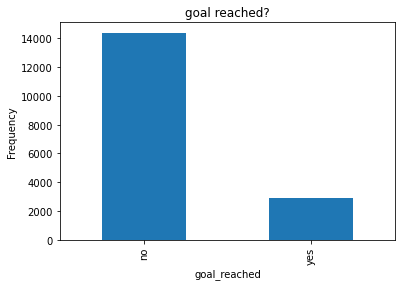

In [196]:
pd.value_counts(df['goal_reached']).plot.bar()
plt.title('goal reached?')
plt.xlabel('goal_reached')
plt.ylabel('Frequency')
df['goal_reached'].value_counts()

**YES** our data is imbalanced, as we have 14.410 'no' values and 2.890 'yes' values

### deal with imbalances